<a href="https://colab.research.google.com/github/kxni23/ITA0636-Machine-Learning/blob/main/day%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First five rows of the synthetic dataset:
   battery_power  ram  internal_memory  talk_time  price_range
0           1860    1               16         14            1
1           2294    2               16         12            1
2           2130    7              128         10            1
3           2095    3              128          9            3
4           2638    2              128          4            3

Basic statistical computations:
       battery_power          ram  internal_memory   talk_time  price_range
count     1000.00000  1000.000000      1000.000000  1000.00000  1000.000000
mean      2518.77300     3.958000       102.096000    11.33000     1.478000
std        865.75822     1.996553        88.516948     4.61632     1.136137
min       1001.00000     1.000000        16.000000     4.00000     0.000000
25%       1774.50000     2.000000        32.000000     7.00000     0.000000
50%       2509.50000     4.000000        64.000000    11.00000     1.000000
75%       3237.

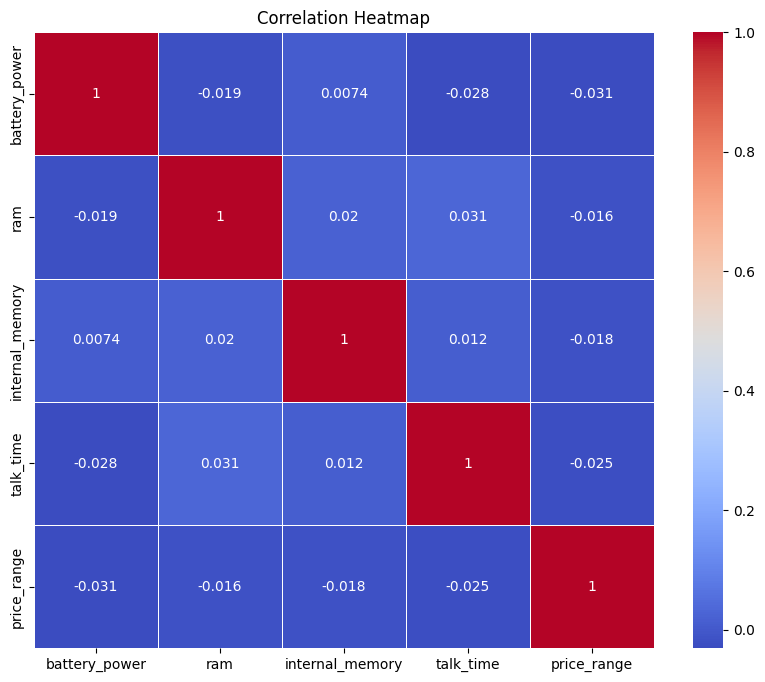


Accuracy of Naive Bayes Classifier: 0.315


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# a) Read the Mobile Price Dataset using Pandas
url = "path_to_dataset.csv"  # Replace with your dataset's path or URL
df = pd.read_csv(url)

# b) Print the First Five Rows
print("First Five Rows:")
print(df.head())

# c) Basic Statistical Computations on the Dataset
print("\nBasic Statistical Computations:")
print(df.describe())

# d) Check the Columns and Their Data Types
print("\nColumns and Their Data Types:")
print(df.info())

# e) Detect and Handle Null Values
print("\nNull Values in the Dataset:")
print(df.isnull().sum())

# Replace null values with the mode of the respective column
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

print("\nNull Values After Replacement:")
print(df.isnull().sum())

# f) Explore the Dataset using a Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of the Dataset')
plt.show()

# g) Split the Data into Train and Test Sets
X = df.drop('price_range', axis=1)  # Features
y = df['price_range']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# h) Fit the Model using Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# i) Predict Using the Model
y_pred = model.predict(X_test)

# j) Find the Accuracy of the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the Model: {accuracy * 100:.2f}%")

# Detailed classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
# Define the dataset
data = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']
]

# Extract the attributes and labels
attributes = data[0][:-1]
examples = [row[:-1] for row in data]
labels = [row[-1] for row in data]

# Initialize the most specific hypothesis
hypothesis = ['0'] * len(attributes)

# Find-S algorithm
for i in range(len(examples)):
    if labels[i] == 'Yes':  # Only consider positive examples
        for j in range(len(attributes)):
            if hypothesis[j] == '0':  # Initialize to the first positive example
                hypothesis[j] = examples[i][j]
            elif hypothesis[j] != examples[i][j]:  # Update hypothesis if different
                hypothesis[j] = '?'

# Output the final hypothesis
print("Final Hypothesis:", hypothesis)

Final Hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


Mean Squared Error (MSE): 0.6536995137170021
R-squared (R²): 0.8072059636181392


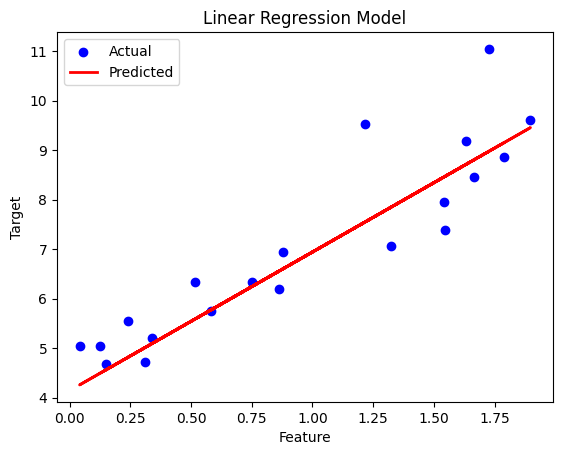

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Generate a Synthetic Dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Convert to DataFrame for better visualization
df = pd.DataFrame(np.hstack((X, y)), columns=['Feature', 'Target'])

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = lin_reg.predict(X_test)

# Step 5: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

First five rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

Accuracy of KNN with k=3: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00 

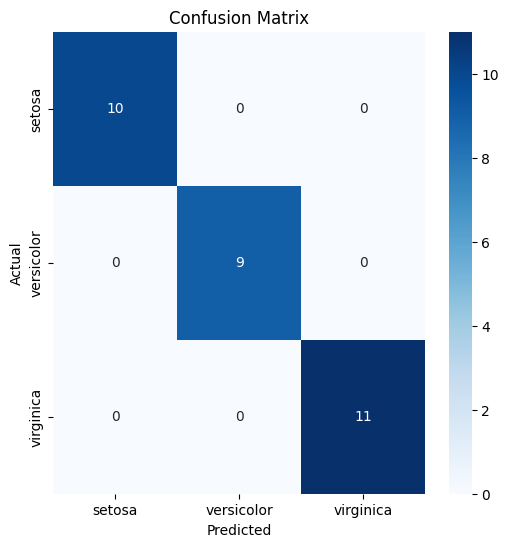

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for better visualization
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Display the first five rows of the dataset
print("First five rows of the Iris dataset:")
print(df.head())

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the Model
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = knn.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of KNN with k={k}: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy of Perceptron: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  non-setosa       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



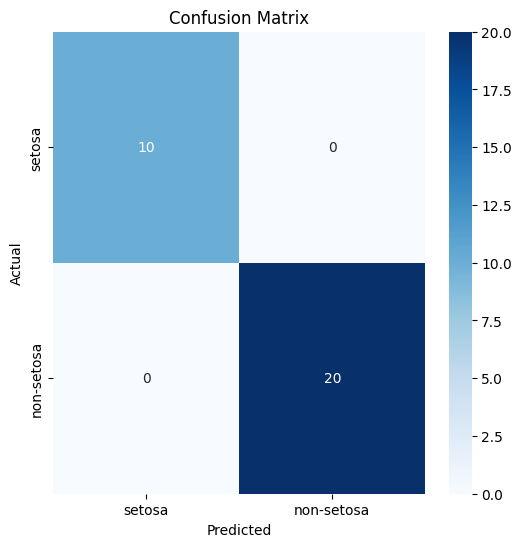